In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import requests

In [11]:
url = "https://api.worldbank.org/v2/country/ARG/indicator/SP.POP.TOTL"
params = {"format": "json"}

response = requests.get(url, params=params)
data = response.json()
df = pd.DataFrame(data[1])

print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   indicator        50 non-null     object
 1   country          50 non-null     object
 2   countryiso3code  50 non-null     object
 3   date             50 non-null     object
 4   value            50 non-null     int64 
 5   unit             50 non-null     object
 6   obs_status       50 non-null     object
 7   decimal          50 non-null     int64 
dtypes: int64(2), object(6)
memory usage: 3.3+ KB
None
              value  decimal
count  5.000000e+01     50.0
mean   3.664644e+07      0.0
std    6.212649e+06      0.0
min    2.587411e+07      0.0
25%    3.141395e+07      0.0
50%    3.700433e+07      0.0
75%    4.205396e+07      0.0
max    4.569616e+07      0.0


In [ ]:
#Limpieza...
# Convertir columnas relevantes
df["date"] = df["date"].astype(int)
df["value"] = pd.to_numeric(df["value"], errors="coerce")

# Ordenar por año
df = df.sort_values("date")

print(df.head())

                                            indicator  \
49  {'id': 'SP.POP.TOTL', 'value': 'Population, to...   
48  {'id': 'SP.POP.TOTL', 'value': 'Population, to...   
47  {'id': 'SP.POP.TOTL', 'value': 'Population, to...   
46  {'id': 'SP.POP.TOTL', 'value': 'Population, to...   
45  {'id': 'SP.POP.TOTL', 'value': 'Population, to...   

                               country countryiso3code  date     value unit  \
49  {'id': 'AR', 'value': 'Argentina'}             ARG  1975  25874107        
48  {'id': 'AR', 'value': 'Argentina'}             ARG  1976  26282283        
47  {'id': 'AR', 'value': 'Argentina'}             ARG  1977  26701805        
46  {'id': 'AR', 'value': 'Argentina'}             ARG  1978  27132158        
45  {'id': 'AR', 'value': 'Argentina'}             ARG  1979  27568895        

   obs_status  decimal  
49                   0  
48                   0  
47                   0  
46                   0  
45                   0  


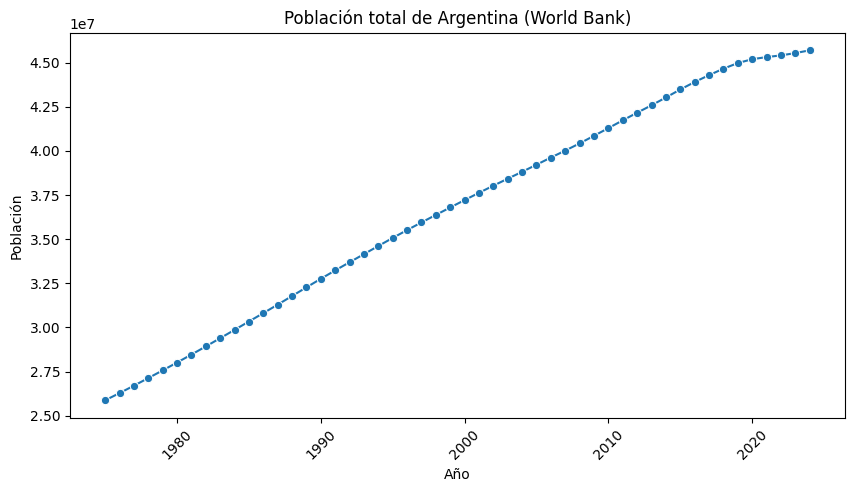

In [10]:
# Visualizacion 
plt.figure(figsize=(10,5))
sns.lineplot(x="date", y="value", data=df, marker="o")
plt.title("Población total de Argentina (World Bank)")
plt.xlabel("Año")
plt.ylabel("Población")
plt.xticks(rotation=45)
plt.show()